# Coding Tutorial 11: Visual Question Answering and VizWiz Dataset Challenge

```
Course: CSCI 5922 Spring 2025, University of Colorado Boulder
TA: Everley Tseng
Email: Yu-Yun.Tseng@colorado.edu
* AI assistant is used in making this tutorial
```

## Overview

Sections:
- Dataset Challenge
- VizWiz Dataset
- Visual Question Answering Model
- Challenge Prediction and Evaluation

Objectives:
- Learn how to read dataset challenge documentation
- Learn how to build and train a VQA model
- Learn how to evaluate model performance and generate prediction files for a dataset challenge

## Dataset Challenge

In the field of deep learning and machine learning, **dataset challenges** play a crucial role in advancing research and improving models. These challenges are competitions where participants are given a specific dataset and tasked with developing models to solve a particular problem. The goal of these challenges is to encourage innovation, foster collaboration, and help push the boundaries of current research.

Participating in dataset challenges allows individuals to:

- **Benchmark their models**: It helps in understanding where your model stands in relation to the state-of-the-art.
- **Learn from the community**: Many challenges provide access to shared resources, such as baseline models and detailed evaluation metrics.
- **Contribute to real-world problems**: Many dataset challenges focus on practical, real-world problems, providing an opportunity to contribute to impactful solutions.

**How to Participate in a Dataset Challenge?**

1. Choose a challenge
2. Understand the problem: Carefully read the challenge description to understand the problem, evaluation metrics, and the dataset.
3. Explore the dataset: Thoroughly explore the dataset to understand the dataset format. Identify potential issues such as missing data, class imbalances, and unusual distributions.
4. Develop the data processing steps: This includes normalization, data cleaning, etc.
3. Develop and train your model: Use the dataset to train or fine-tune your model. Experiment with different architectures and techniques to improve performance.
4. Evaluate your model: Use the provided evaluation metrics to assess how well your model performs on the dataset.
5. Submit your solution: In most challenges, you will need to submit your model's predictions on a test set. **These predictions will be scored based on the challenge evaluation metric**, and the leaderboard will rank the submissions.


In the next section, we will dive deeper into the VizWiz VQA Challenge, an example of a dataset challenge. This challenge focuses on **Visual Question Answering (VQA) for blind and visually impaired individuals**.

## VizWiz VQA Dataset

First, read the challenge [webpage](https://vizwiz.org/tasks-and-datasets/vqa/) thoroughly. We will be working on **Task 1: Predict Answer to a Visual Question** in this tutorial. In this task, we predict the answers based on a given image and a given question.  Now, let's examine the data provided (i.e., images and annotations) and load the data into our script.

### Image and Annotation Paths

Under the **Dataset** section, we see links to available data and the annotation format:
```
"answerable": 0,
"image": "VizWiz_val_00028000.jpg",
"question": "What is this?"
"answer_type": "unanswerable",
"answers": [
    {"answer": "unanswerable", "answer_confidence": "yes"},
    {"answer": "chair", "answer_confidence": "yes"},
    {"answer": "unanswerable", "answer_confidence": "yes"},
    {"answer": "unanswerable", "answer_confidence": "no"},
    {"answer": "unanswerable", "answer_confidence": "yes"},
    {"answer": "text", "answer_confidence": "maybe"},
    {"answer": "unanswerable", "answer_confidence": "yes"},
    {"answer": "bottle", "answer_confidence": "yes"},
    {"answer": "unanswerable", "answer_confidence": "yes"},
    {"answer": "unanswerable", "answer_confidence": "yes"}
]
```

For larger datasets, we recommend downloading data to your local directory (e.g., your computer, your Google Drive) instead of downloading through Colab runtime. Note that if you download via Colab runtime, **the files are deleted when the runtime is deleted**. It is likely that you need to redo these steps every time you open this script. For runtime download, you can use the following commands:
```
!wget https://vizwiz.cs.colorado.edu/VizWiz_final/images/train.zip
!unzip -q train.zip
```

If files are downloaded to a local directory, you can access the files by setting up paths:
```
train_images_path = .../train/
val_images_path = .../val/
test_images_path = .../test/
annotations_path = .../annotations/
```

In [ ]:
# Use Google Drive directory

# from google.colab import drive
# drive.mount('/content/drive')
# dataset_path = '/content/drive/My Drive/VizWiz/'

For our course, we als provide you an alternative option for accessing images and annotations. You can instead request files from the following URLs:

- Images: https://vizwiz.cs.colorado.edu/VizWiz_visualization_img/{image_name}
- Train annotations: https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/train.json
- Validation annotations: https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/val.json
- Test annotations: https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/test.json

Note that acquiring data from URLs through `requests` is typically more time consuming. You can consider this a trade-off between space and time efficiency.
Similar to runtime download, you will need to request these files **every time you run the script**. Especially when there are many files to download, a for loop approach can be time consuming. In this tutorial, we will use the URL request approach for a small set of data. However, **you can use other approaches**.

In [ ]:
import json
import requests
import numpy as np

In [ ]:
# Directory for all images
img_dir = 'https://vizwiz.cs.colorado.edu/VizWiz_visualization_img/'

# Directory for annotation files
ann_dir = 'https://vizwiz.cs.colorado.edu/VizWiz_final/vqa_data/Annotations/'

train_annotation_path = '{}{}'.format(ann_dir, 'train.json')
val_annotation_path = '{}{}'.format(ann_dir, 'val.json')
test_annotation_path = '{}{}'.format(ann_dir, 'test.json')

### Read Annotations

In [ ]:
# Train
train_data = requests.get(train_annotation_path, allow_redirects=True)
train_data = train_data.json()

# Validation
val_data = requests.get(val_annotation_path, allow_redirects=True)
val_data = val_data.json()

# Test
test_data = requests.get(test_annotation_path, allow_redirects=True)
test_data = test_data.json()

print('Train set size:', len(train_data))
print('Validation set size:', len(val_data))
print('Test set size:', len(test_data))

Train set size: 20523
Validation set size: 4319
Test set size: 8000


### See the First Sample

Examine the training set. Does this format match the example shown on the website?

In [ ]:
vq = train_data[0]

# Try printing the entire set of annotation to see the structure
print('First sample:', vq)

# Unpack data: image
image_name = vq['image']
image_url = img_dir + image_name
print('Image URL:', image_url)

# Unpack data: question
question = vq['question']

# Unpack data: labels
answers = vq['answers']
label = vq['answerable']
print('Image name (file name):', image_name)
print('Question:', question)
print('Answer index 0:', answers[0])
print('Answerability label:', label)

First sample: {'image': 'VizWiz_train_00000000.jpg', 'question': "What's the name of this product?", 'answers': [{'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil leaves'}, {'answer_confidence': 'yes', 'answer': 'basil'}], 'answer_type': 'other', 'answerable': 1}
Image URL: https://vizwiz.cs.colorado.edu/VizWiz_visualization_img/VizWiz_train_00000000.jpg
Image name (file name): VizWiz_train_00000000.jpg
Question: What's the name of this product?
Answer index 0: {'answer_confidence': 'yes', 'answer': 'basil leaves'}
Answerability label: 1


You can read/examine the image via the link or in your local path.

https://vizwiz.cs.colorado.edu/VizWiz_visualization_img/VizWiz_train_00000000.jpg


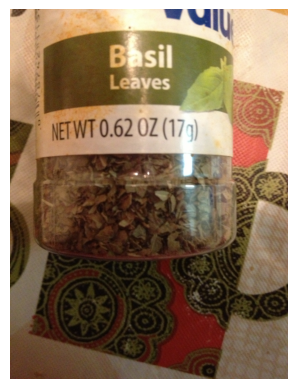

In [ ]:
from skimage import io
import matplotlib.pyplot as plt

# Plot image from the image url
def visualize_image(image_url):
    image = io.imread(image_url)
    print(image_url)
    plt.imshow(image)
    plt.axis("off")
    plt.show()

visualize_image(image_url)

**What about the test set?**

In a dataset challenge, there is usually a test set **without ground truth labels**, so that you instead submit predictions to an evaluation server to compete. Under the section **Submission Format**, we learn that the predictions are to be submitted in this format:

```
results = [result]

result = {
    "image": string, # e.g., 'VizWiz_test_00020000.jpg'
    "answer": string
}
```
We'll come back to this in the last section of this tutorial!

In [ ]:
print('Test sample 0:', test_data[0])

Test sample 0: {'image': 'VizWiz_test_00000000.jpg', 'question': 'What is this? And what color is it?'}


Note that the test set often has a slightly different format since the ground truths are usually missing.

## Visual Question Answering Model

In [ ]:
import torch

Visual Question Answering (VQA) is a popular research task that involves developing systems capable of answering natural language questions based on the content of an image. It combines computer vision and natural language processing to understand visual inputs and generate relevant, contextually appropriate responses. VQA systems provide a more intuitive way for users to interact with and retrieve information from visual data.

- Input: Image + Question (text)
- Output: Answer (text)

To learn more about this task, please read this [pioneering paper](https://arxiv.org/pdf/1505.00468).

In this tutorial, we will demonstrate how to build a toy model to process images and questions for answer prediction. The steps include:
1. Find the most common $n$ answers in the dataset (we'll use $n = 100$)
2. Build a toy model to process both image and question inputs for $n$-class classification

In [ ]:
# For demonstrateion, use a small subset of train
train_subset = train_data[:200]

### Step 1: Top 100 Answers

Let's try the classification approach (see the [VQA paper](https://arxiv.org/pdf/1505.00468) for more details):
1. Find the most popular $n$ answers.
2. Categorize the rest of the answers as "others" (i.e., `other_categories` in the script).
3. Encode the target labels into $n + 1$ classes.


**Discussion**:

How do we decide on a good value for $n$ in our task? when we categorize the remaining answers as "other", we essentially **give up on predicting those answers correctly**. While this helps manage outliers, it can also reduce the model's ability to handle rare but valid responses effectively.

When $n$ is too small, it restricts the model's ability to handle a diverse set of answers. On the other hand, if $n$ is too large, it increases the computational burden and can introduce issues such as sparse classes, which may negatively impact model convergence. Striking the right balance for $n$ is critical for ensuring both accuracy and efficiency.





The `collections` module is a built-in Python library that provides specialized container datatypes, which offer alternatives to the general-purpose built-in types like lists, dictionaries, and tuples. These specialized containers are designed to simplify tasks such as counting elements, organizing data, and maintaining order. It is very useful for data processing, and below, we will use `collections.Counter` to find the top $n$ most common answers.


In [ ]:
from collections import Counter

chosen_answers = []
top_n = 100

# Choose the most common answer from the ten labels
for sample in train_subset:
    answers = [entry['answer'] for entry in sample['answers']]
    answer_counts = Counter(answers) # set up counter
    top_answer, _ = answer_counts.most_common(1)[0] # get top answer out of the ten
    chosen_answers.append(top_answer)

# Count the frequency of answers for all samples
answer_counts = Counter(chosen_answers)
top_answers = answer_counts.most_common(top_n) # top n
print(top_answers)

# Create categories for top n
category_name2id = {answer:ind for ind, (answer, _) in enumerate(top_answers)}
category_id2name = {ind:answer for ind, (answer, _) in enumerate(top_answers)}
category_id2name[top_n] = 'other_categories'

[('unanswerable', 45), ('unsuitable', 29), ('no', 7), ('yes', 4), ('white', 2), ('dog', 2), ('melatonin', 2), ('pink', 2), ('keyboard', 2), ('tv', 2), ('black', 2), ('basil leaves', 1), ('coca cola', 1), ('tomatoes', 1), ('t36m', 1), ('solar garden light', 1), ('shoes', 1), ('mouthwash', 1), ('monitor cleaning kit', 1), ('orange', 1), ('cell phone', 1), ('remote', 1), ('dr pepper', 1), ('80 cents', 1), ('bottle', 1), ('grand theft auto vice city', 1), ('light red kidney beans', 1), ('brides maids', 1), ('raiz el evento', 1), ('toad training', 1), ('brown yes', 1), ('open', 1), ('homestyle italian', 1), ('eq02713', 1), ('jack links', 1), ('apple pie spice', 1), ('sweet sour chicken', 1), ('hulk toy', 1), ('water bottle', 1), ('sirloin steaks', 1), ('wands upside down', 1), ('beavis', 1), ('floral green', 1), ('winnie pooh', 1), ('blue corn tortilla chips', 1), ('books photos speaker', 1), ('vanilla', 1), ('manwich', 1), ('frequency', 1), ('cough drops', 1), ('minute maid coolers', 1), (

There are 10 answers in the annotations. For demonstration, we use the most common answer out of the 10 for training (i.e., as `target`). Can you think of other ways to utilize the 10 answers in training?

In [ ]:
targets = []

for ans in chosen_answers:
    if ans in category_name2id.keys():
        targets.append(category_name2id[ans])
    else:
        targets.append(top_n) # if not in top n, use the n+1 th category

targets_tensor = torch.tensor(targets)
print('Target size:', targets_tensor.shape)

Target size: torch.Size([200])


### Step 2: Process Images

Read the images from training set. Apply resize to `transform` and stack the images into torch style.

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import torch
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize (you can adjust the size)
    transforms.ToTensor(),
])

image_tensors = []
for sample in train_subset:
    image_url = img_dir + sample['image']
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img_tensor = transform(img)
    image_tensors.append(img_tensor)

image_tensors = torch.stack(image_tensors)
print('Train images shape', image_tensors.shape)

Train images shape torch.Size([200, 3, 128, 128])


### Step 3: Process Questions

We have taught various ways to process text inputs in lectures and tutorials. In this tutorial, we use a basic bag-of-words encoding method. The sentences are encoded into a **vocabulary length vector** with existing word indices labeled as `1` and others `0`.

This method might not work well on datasets with higher complexity. You can refer to Coding Tutorials 7, 8, 9, and 10 for other approaches.

In [ ]:
import string
import spacy

questions = [sample['question'] for sample in train_subset]
nlp = spacy.load('en_core_web_sm')
tokenized_questions = []

# Tokenize, remove stop words, lemmatize, and remove punctuation
for question in questions:
    doc = nlp(question.lower())  # lowercase
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    tokenized_questions.append(tokens)

# Create the vocabulary (unique words from all questions)
vocabulary = set(word for question in tokenized_questions for word in question)
vocabulary = sorted(vocabulary)
vocab_size = len(vocabulary)
print('Vocabulary size', len(vocabulary))

# Generate the one-hot encoding manually
bag_of_words = []
for question in tokenized_questions:
    BoW_vector = torch.zeros(vocab_size)
    for ind, voc in enumerate(vocabulary):
        if voc in question:
            BoW_vector[ind] = 1
    bag_of_words.append(BoW_vector)

question_tensors = torch.stack(bag_of_words)
print('Train questions shape', question_tensors.shape)

Vocabulary size 188
Train questions shape torch.Size([200, 188])


### Create a Model

Let's create a very simple model to handle image and question inputs:
- Image: 3 convolutional layers + 1 fully connected layer
- Question: 2 fully-connected layers
- Fusion: Element-wise multiplication for vectors from image and question
- Prediction: 2 fully connected layers

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VQAModel(nn.Module):
    def __init__(self, vocab_size, output_classes, image_channels=3, image_size=128, hidden_dim=512):
        super(VQAModel, self).__init__()

        # Image processing part
        self.conv1 = nn.Conv2d(in_channels=image_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layers after convolutional layers
        self.fc_image = nn.Linear(128 * (image_size // 8) * (image_size // 8), hidden_dim)

        # Question processing part (fully connected)
        self.fc_question1 = nn.Linear(vocab_size, 512)
        self.fc_question2 = nn.Linear(512, hidden_dim)

        # Fusion part: Multiply image and question features
        self.fc_fusion = nn.Linear(hidden_dim, hidden_dim)

        # Final classification layer
        self.fc_output = nn.Linear(hidden_dim, output_classes)

    def forward(self, image, question):
        # Image part
        x_image = F.relu(self.conv1(image))
        x_image = self.pool1(x_image)
        x_image = F.relu(self.conv2(x_image))
        x_image = self.pool2(x_image)
        x_image = F.relu(self.conv3(x_image))
        x_image = self.pool3(x_image)
        x_image = x_image.view(x_image.size(0), -1) # flatten
        x_image = F.relu(self.fc_image(x_image))

        # Question part (Fully Connected)
        x_question = F.relu(self.fc_question1(question))
        x_question = F.relu(self.fc_question2(x_question))

        # Fusion: Multiply image and question features
        x_fusion = x_image * x_question

        # Apply fusion layer
        x_fusion = F.relu(self.fc_fusion(x_fusion))

        # Output classification
        output = self.fc_output(x_fusion)
        return output

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

During training, you can either implement the evaluation metric for the challenge or use other metrics to observe the the learning curve. In this case, I implemented the typical accuracy to observe how well the model is performing on this $n + 1$-class classification task. Note that **this accuracy is different from the accuracy on the challenge page**.

In [ ]:
import torch.optim as optim
import torch

# There will be top_n classes plus "others"
output_classes = top_n + 1

model = VQAModel(vocab_size, output_classes).to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()

    # Move data to GPU if available
    images = image_tensors.to(device)
    questions = question_tensors.to(device)
    targets = targets_tensor.to(device)

    optimizer.zero_grad()
    outputs = model(images, questions)
    loss = criterion(outputs, targets)
    loss.backward()
    optimizer.step()

    _, predicted = torch.max(outputs, 1)  # Set predicted category
    correct = (predicted == targets).sum().item()  # Count correct predictions
    accuracy = correct / targets.size(0)  # Calculate accuracy

    # Print statistics
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()/len(targets):.4f}, Accuracy: {accuracy:.4f}")

Epoch [1/30], Loss: 0.0231, Accuracy: 0.0100
Epoch [2/30], Loss: 0.0230, Accuracy: 0.0350
Epoch [3/30], Loss: 0.0226, Accuracy: 0.2250
Epoch [4/30], Loss: 0.0215, Accuracy: 0.2250
Epoch [5/30], Loss: 0.0191, Accuracy: 0.2250
Epoch [6/30], Loss: 0.0247, Accuracy: 0.2250
Epoch [7/30], Loss: 0.0185, Accuracy: 0.2450
Epoch [8/30], Loss: 0.0185, Accuracy: 0.1450
Epoch [9/30], Loss: 0.0195, Accuracy: 0.1450
Epoch [10/30], Loss: 0.0199, Accuracy: 0.1450
Epoch [11/30], Loss: 0.0200, Accuracy: 0.1450
Epoch [12/30], Loss: 0.0197, Accuracy: 0.1450
Epoch [13/30], Loss: 0.0193, Accuracy: 0.1450
Epoch [14/30], Loss: 0.0188, Accuracy: 0.1450
Epoch [15/30], Loss: 0.0185, Accuracy: 0.1450
Epoch [16/30], Loss: 0.0179, Accuracy: 0.1500
Epoch [17/30], Loss: 0.0171, Accuracy: 0.1600
Epoch [18/30], Loss: 0.0164, Accuracy: 0.3500
Epoch [19/30], Loss: 0.0161, Accuracy: 0.2450
Epoch [20/30], Loss: 0.0159, Accuracy: 0.2400
Epoch [21/30], Loss: 0.0153, Accuracy: 0.2800
Epoch [22/30], Loss: 0.0146, Accuracy: 0.33

## Predict and Evaluate

We'll use a subset of validation set as an example. Prepare the inputs: **images** and **questions**.

In [ ]:
val_subset = train_data[:100]

### Process Inputs

To process questions, we must use the same encoding method as used on the training set. In this case, we use the same `vocabulary` for the bag-of-words approach.

In [ ]:
# Validation questions
val_questions = [sample['question'] for sample in val_subset]
val_tokenized_questions = []

# Tokenize, remove stop words, lemmatize, and remove punctuation
for question in val_questions:
    doc = nlp(question.lower())  # lowercase
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    val_tokenized_questions.append(tokens)

# Generate the one-hot encoding manually
bag_of_words = []
for question in val_questions:
    BoW_vector = torch.zeros(vocab_size)
    for ind, voc in enumerate(vocabulary):
        if voc in question:
            BoW_vector[ind] = 1
    bag_of_words.append(BoW_vector)

val_question_tensors = torch.stack(bag_of_words)
print('Train questions shape', val_question_tensors.shape)

Train questions shape torch.Size([100, 188])


Now, process image inputs using the same method for the training set. You must use the same `transform` style, or there can be a mismatch in size or normalization.

In [ ]:
# Validation images
val_image_tensors = []

for sample in val_subset:
    image_url = img_dir + sample['image']
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    img_tensor = transform(img)
    val_image_tensors.append(img_tensor)

val_image_tensors = torch.stack(val_image_tensors)
print('Train images shape', val_image_tensors.shape)

Train images shape torch.Size([100, 3, 128, 128])


### Predict

In [ ]:
model.eval()

with torch.no_grad():
    images = val_image_tensors.to(device)
    questions = val_question_tensors.to(device)
    outputs = model(images, questions)
    _, predicted = torch.max(outputs, 1)

predictions = predicted.cpu().numpy()
answers = [category_id2name[pred] for pred in predictions]

print('Predictions (category IDs):', predictions)
print('Converted to answers:', answers)

Predictions (category ID): [ 3  3 13  3  3  3  3  1  3  3  1 52  3  3  2  4  2  3  3  2  1  1  3  3
  2  1  3  0  3  1  2  3 30  3  0  3  1  0  3  3 65  3  1  3  3  3  3  0
  3  3  0  1  3  2  1  2 42  1  2  1  3  3 30  3  3  1  0  3  3  3  3  2
  1  1  1  2 77 50  2  3  3  3 52  3  0  3  7  2  3  3  2  3  3  3  3  1
  3  0 58  3]
Converted to answers: ['yes', 'yes', 'tomatoes', 'yes', 'yes', 'yes', 'yes', 'unsuitable', 'yes', 'yes', 'unsuitable', 'mustard', 'yes', 'yes', 'no', 'white', 'no', 'yes', 'yes', 'no', 'unsuitable', 'unsuitable', 'yes', 'yes', 'no', 'unsuitable', 'yes', 'unanswerable', 'yes', 'unsuitable', 'no', 'yes', 'brown yes', 'yes', 'unanswerable', 'yes', 'unsuitable', 'unanswerable', 'yes', 'yes', 'dark', 'yes', 'unsuitable', 'yes', 'yes', 'yes', 'yes', 'unanswerable', 'yes', 'yes', 'unanswerable', 'unsuitable', 'yes', 'no', 'unsuitable', 'no', 'floral green', 'unsuitable', 'no', 'unsuitable', 'yes', 'yes', 'brown yes', 'yes', 'yes', 'unsuitable', 'unanswerable', 'yes'

### Simulate Evaluation Server

The given evaluation metric for answer prediction is based on this formula:

$accuracy = min(\frac{\text{# humans that provided that answer}}{3}, 1)$

This means that each sample gets one of the following scores:
- Score = $1$: When 3 or more of the human annotations match the prediction
- Score = $\frac{2}{3}$: When 2 of the human annotations match the prediction
- Score = $\frac{1}{3}$: When 1 of the human annotations matches the prediction
- Score = $0$: When none of the human annoations matchs the prediction


Let's now implement this metric and use it to evaluate the model performance!

In [ ]:
# Implement the given metric
def calculate_accuracy(predicted_answer, human_answers):

    # Normalize answers (to lowercase)
    predicted_answer = predicted_answer.lower()
    human_answers = [answer['answer'].lower() for answer in human_answers]

    # Get the count of humans who agreed with the predicted answer
    answer_counts = Counter(human_answers)
    humans_agreed = answer_counts.get(predicted_answer, 0)

    # Calculate accuracy: min(# humans who agreed / 3, 1)
    accuracy = min(humans_agreed / 3, 1)

    return accuracy

# Process all results for your score
def evaluation_server(predicted_answer, annotations):
    accs = []
    for pred, ann in zip(predicted_answer, annotations):
        accs.append(calculate_accuracy(pred, ann['answers']))
    return np.mean(accs)

In [ ]:
score = evaluation_server(answers, val_subset)
print('Validation set score:', score)

Validation set score: 0.3133333333333333


### Generate Submission File

As indicated on the challenge page, the submission file should be in the following format:
```
results = [result]

result = {
    "image": string, # e.g., 'VizWiz_test_00020000.jpg'
    "answer": string
}
```

For submission, we need to make sure that our format matches what's on the challenge server:

In [ ]:
image_names = [sample['image'] for sample in val_subset]
answers = [category_id2name[pred] for pred in predictions]
results = [{'image':image, 'answer':ans} for image, ans in zip(image_names, answers)]

print('Check the format for the first sample:', results[0])

Check the format for the first sample: {'image': 'VizWiz_train_00000000.jpg', 'answer': 'yes'}


To save the json file, uncomment the next cell. If you're using Colab, connect to Google Drive and change the path to:
```
/content/drive/My Drive/...
```


In [ ]:
# with open('your/local/path/my_predictions.json', 'w') as f:
#     json.dump(results, f)

Note that for challenge submission, it would be results on the `test` set that are submitted (instead of the `val` set). However, you cannot evaluate performance on the `test` set independently since the ground truth is hidden.

## Review

Participating in dataset challenges can be very fun! This code should be helpful for your final lab assignment, where you will get to compete with your classmates on VizWiz challenges (coming soon!). Some good starting points include:
1. Find what makes most sense for your computing/space resource based on your goals for the dataset size: examples include Colab, a personal computer, Google Cloud, or Jetstream2!
2. Implement data batching for training and evaluation: especially for larger datasets, you might run out of memory when training/evaluating the model.
3. Tweak the model: Play with the architecture, embedding, hyperparameters, and more.
4. Have fun!


For any questions and discussions regarding this tutorial, attend [TA office hours](https://docs.google.com/spreadsheets/d/1fzfTJpEF7RaUYRA_NGa3DkiazdQXVj7QNBbp6DrEZ3I/edit?usp=sharing) or create a post on [Piazza](https://piazza.com/colorado/spring2025/csci5922/home) :) See you in the next tutorial!

\- Everley